<module 'matplotlib.pyplot' from 'C:\\ALEX\\Software\\ANACONDA\\lib\\site-packages\\matplotlib\\pyplot.py'>

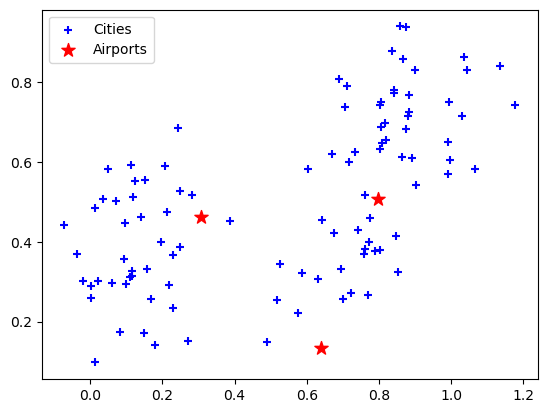

In [240]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt;

# Solution part

### Splitting the cities

In [241]:
original_airports = airports

In [242]:
x1 = airports[0][0]
y1 = airports[0][1]
x2 = airports[1][0]
y2 = airports[1][1]
x3 = airports[2][0]
y3 = airports[2][1]

In [243]:
cities_list = list(cities) #making a list for iteration purposes
cities_1 = []
cities_2 = []
cities_3 = []

#I first calculate the distance from each city to the different airports
#if the city is closer to Airport i, it gets added to cities_i.
for city in cities_list:
    d1 = ((x1-city[0])**2 + (y1-city[1])**2) **0.5
    d2 = ((x2-city[0])**2 + (y2-city[1])**2) **0.5
    d3 = ((x3-city[0])**2 + (y3-city[1])**2) **0.5
    if d1<=d2 and d1<d3:
        cities_1.append(city)
    if d2<d1 and d2<=d3:
        cities_2.append(city)
    if d3<=d1 and d3<d2:
        cities_3.append(city)

### Gradient Descent

In [244]:
def objective_function(x1,y1,x2,y2,x3,y3):
    sum1=0
    sum2=0
    sum3=0
    for i in range(len(cities_1)):
        sum1 = sum1 + (x1 - cities_1[i][0])**2 + (y1 - cities_1[i][1])**2
    for i in range(len(cities_2)):
        sum2 = sum2 + (x2 - cities_2[i][0])**2 + (y2 - cities_2[i][1])**2
    for i in range(len(cities_3)):
        sum3 = sum3 + (x3 - cities_3[i][0])**2 + (y3 - cities_3[i][1])**2
    return sum1+sum2+sum3


In [245]:
def gradient(x1,y1,x2,y2,x3,y3):
    grad_x1 = 0
    grad_x2 = 0
    grad_x3 = 0
    grad_y1 = 0
    grad_y2 = 0
    grad_y3 = 0
    
    for i in range(len(cities_1)):
        grad_x1 = grad_x1 + (x1 - cities_1[i][0])
        grad_y1 = grad_y1 + (y1 - cities_1[i][1])
    
    for i in range(len(cities_2)):
        grad_x2 = grad_x2 + (x2 - cities_2[i][0])
        grad_y2 = grad_y2 + (y2 - cities_2[i][1])
    
    for i in range(len(cities_3)):
        grad_x3 = grad_x3 + (x3 - cities_3[i][0])
        grad_y3 = grad_y3 + (y3 - cities_3[i][1])

    return 2*grad_x1,2*grad_y1,2*grad_x2,2*grad_y2,2*grad_x3,2*grad_y3

In [246]:
x1 = airports[0][0]
y1 = airports[0][1]
x2 = airports[1][0]
y2 = airports[1][1]
x3 = airports[2][0]
y3 = airports[2][1]

objective_list = []    
    
max_iterations = 1000 #maximum number of iterations allowed for the algorithm to converge
alpha = 0.008 #learning rate found by trying different values
threshold = 1e-7 #difference between objective value and new objective value, defining if convergence has been reached

for iteration in range(max_iterations):
    current_objective = objective_function(x1, y1, x2, y2, x3, y3)
    grad = gradient(x1, y1, x2, y2, x3, y3)
    objective_list.append(current_objective)
    #print(x1,x2,x3)

    # I update the variables using the gradient descent 
    x1 -= alpha * grad[0]
    y1 -= alpha * grad[1]
    x2 -= alpha * grad[2]
    y2 -= alpha * grad[3]
    x3 -= alpha * grad[4]
    y3 -= alpha * grad[5]

    # Check for convergence
    new_objective = objective_function(x1, y1, x2, y2, x3, y3)
    #print(new_objective)
    if (abs(new_objective - current_objective) < threshold):
        print(f"Converged after {iteration + 1} iterations.")
        break


Converged after 43 iterations.


In [247]:
new_airports=[]
new_airports.append((x1,y1))
new_airports.append((x2,y2))
new_airports.append((x3,y3))

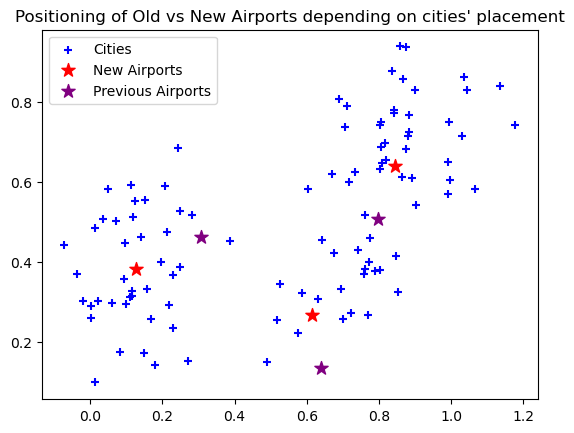

In [251]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*new_airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='New Airports')
zip_airs2 = zip(*original_airports)
plt.scatter(*zip_airs2, marker='*', color='purple', s=100, label='Previous Airports')
plt.legend()
plt.title("Positioning of Old vs New Airports depending on cities' placement")
plt;

In [249]:
#objective_list

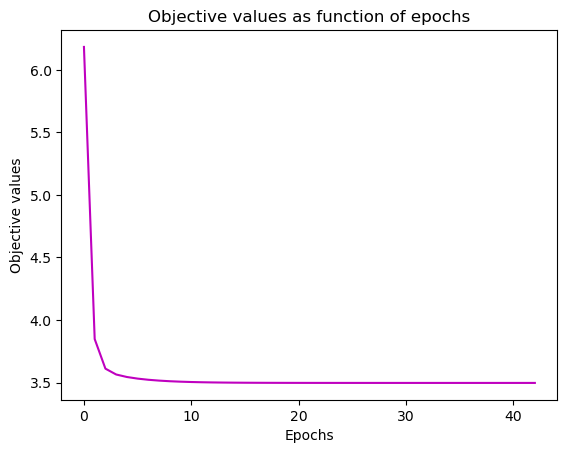

In [250]:
plt.plot(objective_list,"m")
plt.title("Objective values as function of epochs")
plt.xlabel("Epochs")
plt.ylabel("Objective values")
plt;